<a href="https://colab.research.google.com/github/fahmidjobbi/back-pepolls/blob/main/NLP_Clean_Reddit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/reddit_posts.csv')
df

,Title,Post Text,Subreddit
0,VVTokens: Financial Services More Accessible,The​ ​Token​ ​to Make Electronic Financial Ser...,startup
1,We just raised USD 30M to make Contra the plat...,https://www.reddit.com/r/startups/comments/lqp...,startup
2,I built a website that teaches anyone who has ...,I've been working with all kinds of early-stag...,startup
3,"We made $2,5M with content marketing",This is a true story!\n\nThe backbone of our c...,startup
4,After more than a year of design & coding we l...,Logology ([https://www.logology.co](https://ww...,startup
...,...,...,...
25175,Adding r/baseball as a default community for t...,The baseball postseason is already underway! A...,announcements
25176,Sunsetting Secret Santa and Reddit Gifts,Today is a difficult one:. 2021 will be the la...,announcements
25177,New addition to site-wide rules regarding the ...,Hello All—\n\nWe want to let you know that we ...,announcements
25178,"Debate, dissent, and protest on Reddit",Hey everyone–\n\nThe pandemic has been extreme...,announcements


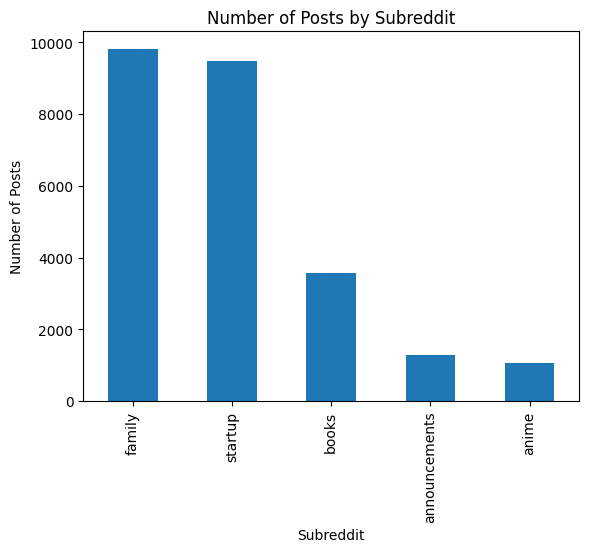

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Count the number of posts in each subreddit
counts = df['Subreddit'].value_counts()

# Plot a bar chart of the counts
fig, ax = plt.subplots()
counts.plot(kind='bar', ax=ax)

# Set the chart title and axis labels
ax.set_title('Number of Posts by Subreddit')
ax.set_xlabel('Subreddit')
ax.set_ylabel('Number of Posts')

# Show the plot
plt.show()


In [ ]:
# Common data handling libraries
import os
import string
import pandas as pd
import numpy as np
import glob
import pickle

# Gensim for LDA
import gensim

# NLTK for test processing
import nltk
nltk.download('stopwords')

# spacy for Lemmatization
import spacy

# Visualization
import matplotlib.pyplot as plt

# Deep learning modeling
import keras

# Model evaluation metrics
import sklearn

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def clean_text(data):

    # convert to lower case
    data = [word.lower() for word in data.split()]
    
    # prepare translation table for removing punctuation
    table = str.maketrans('', '', string.punctuation)
    # remove punctuation from each word
    data = [word.translate(table) for word in data]
    
    # remove tokens with numbers in them
    data = [word for word in data if word.isalpha()]   
    
    # remove stopwords
    data = [word for word in data if word not in nltk.corpus.stopwords.words('english')]
    
    return data

data_caption=[]
data_caption = list(df['Post Text'].apply(lambda x : clean_text(x)))
data_caption[:5]

[['make',
  'electronic',
  'financial',
  'services',
  'accessible',
  'affordable',
  'initial',
  'coin',
  'offering',
  'launches',
  'december',
  'edt',
  'vvtoken',
  'intends',
  'issue',
  'two',
  'versions',
  'cards',
  'one',
  'individuals',
  'another',
  'corporate',
  'users',
  'corporate',
  'card',
  'offer',
  'premium',
  'features',
  'designed',
  'rival',
  'traditional',
  'corporate',
  'cards',
  'vvtoken',
  'new',
  'ethereum',
  'token',
  'provides',
  'financial',
  'solution',
  'allows',
  'people',
  'work',
  'fiat',
  'cryptocurrency',
  'platform',
  'user',
  'add',
  'value',
  'card',
  'fiat',
  'currency',
  'asset',
  'appreciation',
  'balance',
  'achieved',
  'smart',
  'protocol',
  'card',
  'also',
  'used',
  'normal',
  'debit',
  'card',
  'detail',
  'httpsvvtokenscom'],
 [],
 ['ive',
  'working',
  'kinds',
  'earlystage',
  'startups',
  'bootstrapped',
  'seed',
  'series',
  'years',
  'ive',
  'made',
  'habit',
  'write',
 

In [ ]:
!python -m spacy download en_core_web_sm

2023-04-16 01:47:29.339108: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 43.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [ ]:
!pip install spacy
!python -m spacy validate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2023-04-16 01:48:22.027258: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
✔ Loaded compatibility table

================= Installed pipeline packages (spaCy v3.5.1) =================
ℹ spaCy installation: /usr/local/lib/python3.9/dist-packages/spacy

NAME             SPACY            VERSION                            
en_core_web_sm   >=3.5.0,<3.6.0   3.5.0   ✔



In [ ]:
import spacy

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
#nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']
data_caption_lemmatized=[]
data_caption_lemmatized = [[word.lemma_ for word in nlp(str(' '.join(doc))) if word.pos_ in allowed_postags] 
                           for doc in data_caption]
data_caption_lemmatized[:5]






[['make',
  'electronic',
  'financial',
  'service',
  'accessible',
  'affordable',
  'initial',
  'coin',
  'offering',
  'launch',
  'vvtoken',
  'intend',
  'issue',
  'version',
  'card',
  'individual',
  'corporate',
  'user',
  'corporate',
  'card',
  'offer',
  'premium',
  'feature',
  'design',
  'rival',
  'traditional',
  'corporate',
  'card',
  'vvtoken',
  'new',
  'ethereum',
  'token',
  'provide',
  'financial',
  'solution',
  'allow',
  'people',
  'work',
  'cryptocurrency',
  'platform',
  'user',
  'add',
  'value',
  'card',
  'fiat',
  'currency',
  'asset',
  'appreciation',
  'balance',
  'achieve',
  'smart',
  'protocol',
  'card',
  'also',
  'use',
  'normal',
  'debit',
  'card',
  'detail',
  'httpsvvtokenscom'],
 [],
 ['ve',
  'work',
  'kind',
  'earlystage',
  'startup',
  'bootstrappe',
  'seed',
  'series',
  'year',
  've',
  'make',
  'habit',
  'write',
  've',
  'learn',
  'way',
  'finally',
  've',
  'gather',
  'courage',
  'launch',
  'v

In [ ]:

df['Post_lemmatized'] = data_caption_lemmatized
df.head()

,Title,Post Text,Subreddit,Post_lemmatized
0,VVTokens: Financial Services More Accessible,The​ ​Token​ ​to Make Electronic Financial Ser...,startup,"[make, electronic, financial, service, accessi..."
1,We just raised USD 30M to make Contra the plat...,https://www.reddit.com/r/startups/comments/lqp...,startup,[]
2,I built a website that teaches anyone who has ...,I've been working with all kinds of early-stag...,startup,"[ve, work, kind, earlystage, startup, bootstra..."
3,"We made $2,5M with content marketing",This is a true story!\n\nThe backbone of our c...,startup,"[true, story, backbone, company, success, hear..."
4,After more than a year of design & coding we l...,Logology ([https://www.logology.co](https://ww...,startup,"[logology, httpswwwlogologycohttpswwwlogologyc..."


In [ ]:

# save the dataframe as a CSV file
df.to_csv('Clean_Data_NLP.csv', index=False)